In [11]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [3]:
master_table = Table.read('/Users/kellydouglass/Desktop/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

## $V_{max}$ of best fit

In [4]:
master_table['v_max'] = -1.
#master_table['v_max'].unit = 'km / s'

for i in range(len(master_table)):
    curve = master_table['curve_used'][i]
    
    #if curve != 'non' and curve != 'none':
    if curve == -1:
        master_table['v_max'][i] = master_table['neg_v_max'][i]
    elif curve == 0:
        master_table['v_max'][i] = master_table['avg_v_max'][i]
    elif curve == 1:
        master_table['v_max'][i] = master_table['pos_v_max'][i]

## Split by environment

In [4]:
vboolean = master_table['vflag'] == 1
wboolean = master_table['vflag'] == 0

void_table = master_table[vboolean]
wall_table = master_table[wboolean]
edge_table = master_table[np.logical_not(np.logical_or(vboolean, wboolean))]

## Tully-Fisher relation

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


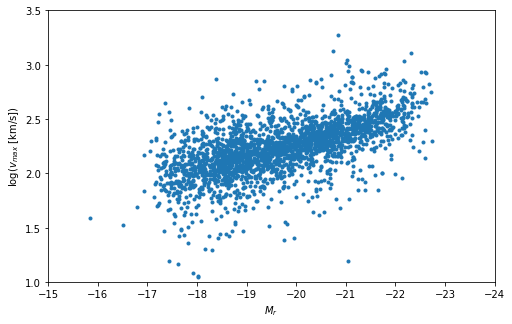

In [16]:
%matplotlib inline

plt.figure(figsize=(8,5))

'''
plt.plot(edge_table['rabsmag'], np.log10(edge_table['v_max'].data), 'go', fillstyle='none', alpha=0.5, 
         label='Unknown')
plt.plot(wall_table['rabsmag'], np.log10(wall_table['v_max'].data), 'k^', alpha=0.5, label='Wall')
plt.plot(void_table['rabsmag'], np.log10(void_table['v_max'].data), 'ro', alpha=0.5, label='Void')
'''
plt.plot(master_table['rabsmag'], np.log10(master_table['v_max']), '.')

Mr = np.linspace(-25,-13)
#plt.plot(Mr, Mr/-6.25 - 0.9, 'b-', label='Tully & Fisher (1977)')
#plt.plot(Mr, Mr/-8.25 - 0.15, 'b-', label='Tully & Fisher (1977)')

plt.xlabel('$M_r$')
plt.ylabel('$\log(v_{max}$ [km/s])')

plt.xlim((-15,-24))
plt.ylim((1,3.5));

#plt.legend();

#plt.savefig('../Images/TullyFisher.eps', format='eps', dpi=500)